In [34]:
from br_demography  import municipality_deaths as md
import basedosdados as bd
from dotenv import load_dotenv
import os
import pandas as pd # importação de biblioteca de manipulação de dados tabulares
import matplotlib.pyplot as plt # importação de biblioteca de plotagem de gráficos 
import numpy as np # importação de biblioteca para cálculos matemáticos
from scipy.optimize import curve_fit # importação de função a ser utilizada para ajuste de modelo preditivo 
from itertools import product # importação de função voltada para otimização de laços de iteração
import warnings
from itertools import product



# Carrega as variáveis de ambiente do arquivo .env
load_dotenv(dotenv_path='./br_demography/.env')

# Use as variáveis de ambiente conforme necessário
project_id = os.getenv('GOOGLE_CLOUD_PROJECT_ID')

## Obtenção e Tratamento de Dados

### Dados de Óbitos

In [35]:
df_deaths = md.query_deaths(mun_id=4104006, project_id=project_id, start_year=2000, end_year=2022)
df_deaths

Downloading: 100%|██████████| 5951/5951 [00:00<00:00, 14822.12rows/s]


,Ano,Sexo,Idade
0,2000,1,NaN
1,2000,1,NaN
2,2000,1,NaN
3,2000,1,NaN
4,2000,1,NaN
...,...,...,...
5946,2022,2,90.0
5947,2022,2,92.0
5948,2022,2,92.0
5949,2022,2,95.0


In [36]:
df_deaths = md.standard_age_groups(df=df_deaths, age_group_csv_path='./br_demography/source/tab/faixas_etarias_censo_2000_2010.csv')
df_deaths

Ano                        2000  2001  2002  2003  2004  2005  2006  2007  \
Sexo      Faixa Etária                                                      
Feminino  0 a 9 anos          7     3     5     4     3     0     1     0   
          10 a 19 anos        2     4     2     3     0     3     1     0   
          20 a 29 anos        1     5     4     3     1     2     2     5   
          30 a 39 anos        4     3     4     2     4     6     4     3   
          40 a 49 anos        2     3     8     6     3     8    12    10   
          50 a 59 anos       13    11    15    10    13    13    13    13   
          60 a 69 anos       15    14    15     7    15    15    20    18   
          70 a 79 anos       10    14     8    15    15    20    21    21   
          80 anos ou mais     8     9     7    12    11    13    12    12   
Masculino 0 a 9 anos         10     5     3     5     5     3     3     4   
          10 a 19 anos        5     1     8     8     4     8     4    11   
          20 a 29 anos        7     6    13    11    14    12     9    14   
          30 a 39 anos       15     7    14    13     8     8    11     7   
          40 a 49 anos       19    14    15    13    17    17    14    24   
          50 a 59 anos       23    19    17    21    14    11    17    18   
          60 a 69 anos       24    16    29    25    20    20    25    33   
          70 a 79 anos       13    18    17    21    25    15    23    33   
          80 anos ou mais    12     5    15    15    15    16    13    14   

Ano                        2008  2009  ...  2013  2014  2015  2016  2017  \
Sexo      Faixa Etária                 ...                                 
Feminino  0 a 9 anos          3     1  ...     1     0     1     2     3   
          10 a 19 anos        3     3  ...     1     1     1     3     1   
          20 a 29 anos        2     5  ...     3     3     3     4     6   
          30 a 39 anos        3     3  ...     4     5     0     3     4   
          40 a 49 anos       12     3  ...     7     5    11     3     5   
          50 a 59 anos       12    11  ...    16    12    12    18    17   
          60 a 69 anos       22    20  ...    23    15     9    25    20   
          70 a 79 anos       18    17  ...    26    18    29    20    27   
          80 anos ou mais    19    15  ...    26    29    27    34    21   
Masculino 0 a 9 anos          7     2  ...     2     3     1     2     1   
          10 a 19 anos        6     9  ...    11     7     8    11     5   
          20 a 29 anos       17    28  ...    19    17    19    12    13   
          30 a 39 anos       14    18  ...    20    13    11    19     7   
          40 a 49 anos       18    18  ...    10    16     8    15     7   
          50 a 59 anos       19    18  ...    28    29    28    38    25   
          60 a 69 anos       31    30  ...    34    28    27    29    24   
          70 a 79 anos       12    23  ...    28    30    32    25    32   
          80 anos ou mais     8    22  ...    15    24    20    29    25   

Ano                        2018  2019  2020  2021  2022  
Sexo      Faixa Etária                                   
Feminino  0 a 9 anos          5     1     1     1     3  
          10 a 19 anos        2     1     1     1     1  
          20 a 29 anos        4     2     7     4     6  
          30 a 39 anos        3     1     5     4     5  
          40 a 49 anos        7     7     9    24     5  
          50 a 59 anos       18    19    24    40    14  
          60 a 69 anos       22    24    34    38    32  
          70 a 79 anos       27    27    36    39    43  
          80 anos ou mais    34    30    23    38    36  
Masculino 0 a 9 anos          1     2     2     2     3  
          10 a 19 anos        2     4     4     4     2  
          20 a 29 anos        8     7     6    10    12  
          30 a 39 anos       20    10    12    23    14  
          40 a 49 anos       17    18    21    35    23  
          

### Dados de População por Sexo e Idade entre 2000 e 2022 

In [37]:
df_pop = pd.read_csv(filepath_or_buffer='./br_demography/results/tab/pop_municipios_rmc_2000_2022_estimativa_intercensitaria.csv', sep=';')
df_pop[df_pop['Faixa Etária'].isin(values=df_deaths.index)]
df_pop.set_index(keys=['Sexo','Faixa Etária'], inplace=True)
df_pop.columns = df_pop.columns.astype(int)
df_pop


2000  2001  2002  2003  2004  2005  2006  2007  \
Sexo      Faixa Etária                                                      
Feminino  0 a 9 anos       3720  3661  3604  3548  3492  3437  3383  3331   
          10 a 19 anos     3517  3539  3562  3586  3609  3633  3656  3680   
          20 a 29 anos     3248  3278  3309  3340  3371  3402  3434  3466   
          30 a 39 anos     2793  2825  2858  2891  2925  2959  2993  3028   
          40 a 49 anos     1803  1872  1944  2019  2097  2178  2261  2349   
          50 a 59 anos      993  1052  1116  1183  1255  1330  1411  1496   
          60 a 69 anos      591   615   640   667   694   723   753   784   
          70 a 79 anos      268   282   298   315   332   351   371   391   
          80 anos ou mais    63    68    74    81    88    96   105   115   
Masculino 0 a 9 anos       3939  3857  3776  3698  3621  3545  3472  3399   
          10 a 19 anos     3787  3794  3802  3809  3817  3824  3832  3840   
          20 a 29 anos     3243  3267  3292  3317  3343  3368  3394  3420   
          30 a 39 anos     2697  2733  2770  2807  2845  2884  2923  2963   
          40 a 49 anos     1933  1977  2023  2070  2117  2166  2216  2268   
          50 a 59 anos     1073  1123  1176  1232  1291  1352  1416  1483   
          60 a 69 anos      585   609   635   662   690   720   750   782   
          70 a 79 anos      250   265   280   297   315   334   354   376   
          80 anos ou mais    63    67    71    76    82    87    93   100   

                           2008  2009  ...  2013  2014  2015  2016  2017  \
Sexo      Faixa Etária                 ...                                 
Feminino  0 a 9 anos       3278  3227  ...  3223  3239  3255  3271  3287   
          10 a 19 anos     3704  3728  ...  3677  3653  3628  3604  3579   
          20 a 29 anos     3499  3531  ...  3621  3641  3660  3679  3699   
          30 a 39 anos     3063  3098  ...  3323  3389  3456  3524  3593   
          40 a 49 anos     2439  2533  ...  2844  2919  2996  3075  3157   
          50 a 59 anos     1586  1682  ...  2027  2116  2208  2305  2405   
          60 a 69 anos      817   850  ...  1085  1161  1243  1330  1423   
          70 a 79 anos      413   436  ...   547   579   613   649   687   
          80 anos ou mais   125   136  ...   186   200   215   232   250   
Masculino 0 a 9 anos       3329  3259  ...  3246  3264  3283  3301  3320   
          10 a 19 anos     3847  3855  ...  3797  3775  3754  3732  3711   
          20 a 29 anos     3446  3472  ...  3574  3599  3625  3651  3677   
          30 a 39 anos     3003  3043  ...  3236  3288  3341  3394  3449   
          40 a 49 anos     2320  2374  ...  2630  2701  2774  2848  2925   
          50 a 59 anos     1553  1626  ...  1907  1980  2056  2134  2216   
          60 a 69 anos      816   850  ...  1049  1109  1173  1241  1312   
          70 a 79 anos      398   422  ...   518   543   570   599   628   
          80 anos ou mais   106   114  ...   147   157   168   179   191   

                           2018  2019  2020  2021  2022  
Sexo      Faixa Etária                                   
Feminino  0 a 9 anos       3303  3319  3336  3352  3369  
          10 a 19 anos     3555  3531  3508  3484  3461  
          20 a 29 anos     3718  3738  3758  3778  3798  
          30 a 39 anos     3664  3736  3810  3885  3962  
          40 a 49 anos     3240  3325  3413  3503  3596  
          50 a 59 anos     2510  2620  2735  2854  2979  
          60 a 69 anos     1523  1630  1744  1867  1998  
          70 a 79 anos      727   770   815   863   914  
          80 anos ou mais   269   289   312   336   362  
Masculino 0 a 9 anos       3338  3357  3376  3395  3415  
          10 a 19 anos     3690  3669  3648  3627  3607  
          20 a 29 anos     3703  3729  3756  3783  3810  
          30 a 39 anos     3505  3561  3618  3676  3736  
          40 a 49 anos     3004  3085  3168  3253  3341  
          50 a 59 anos     2301  2389

## Cálculo de Taxa de Fertilidade

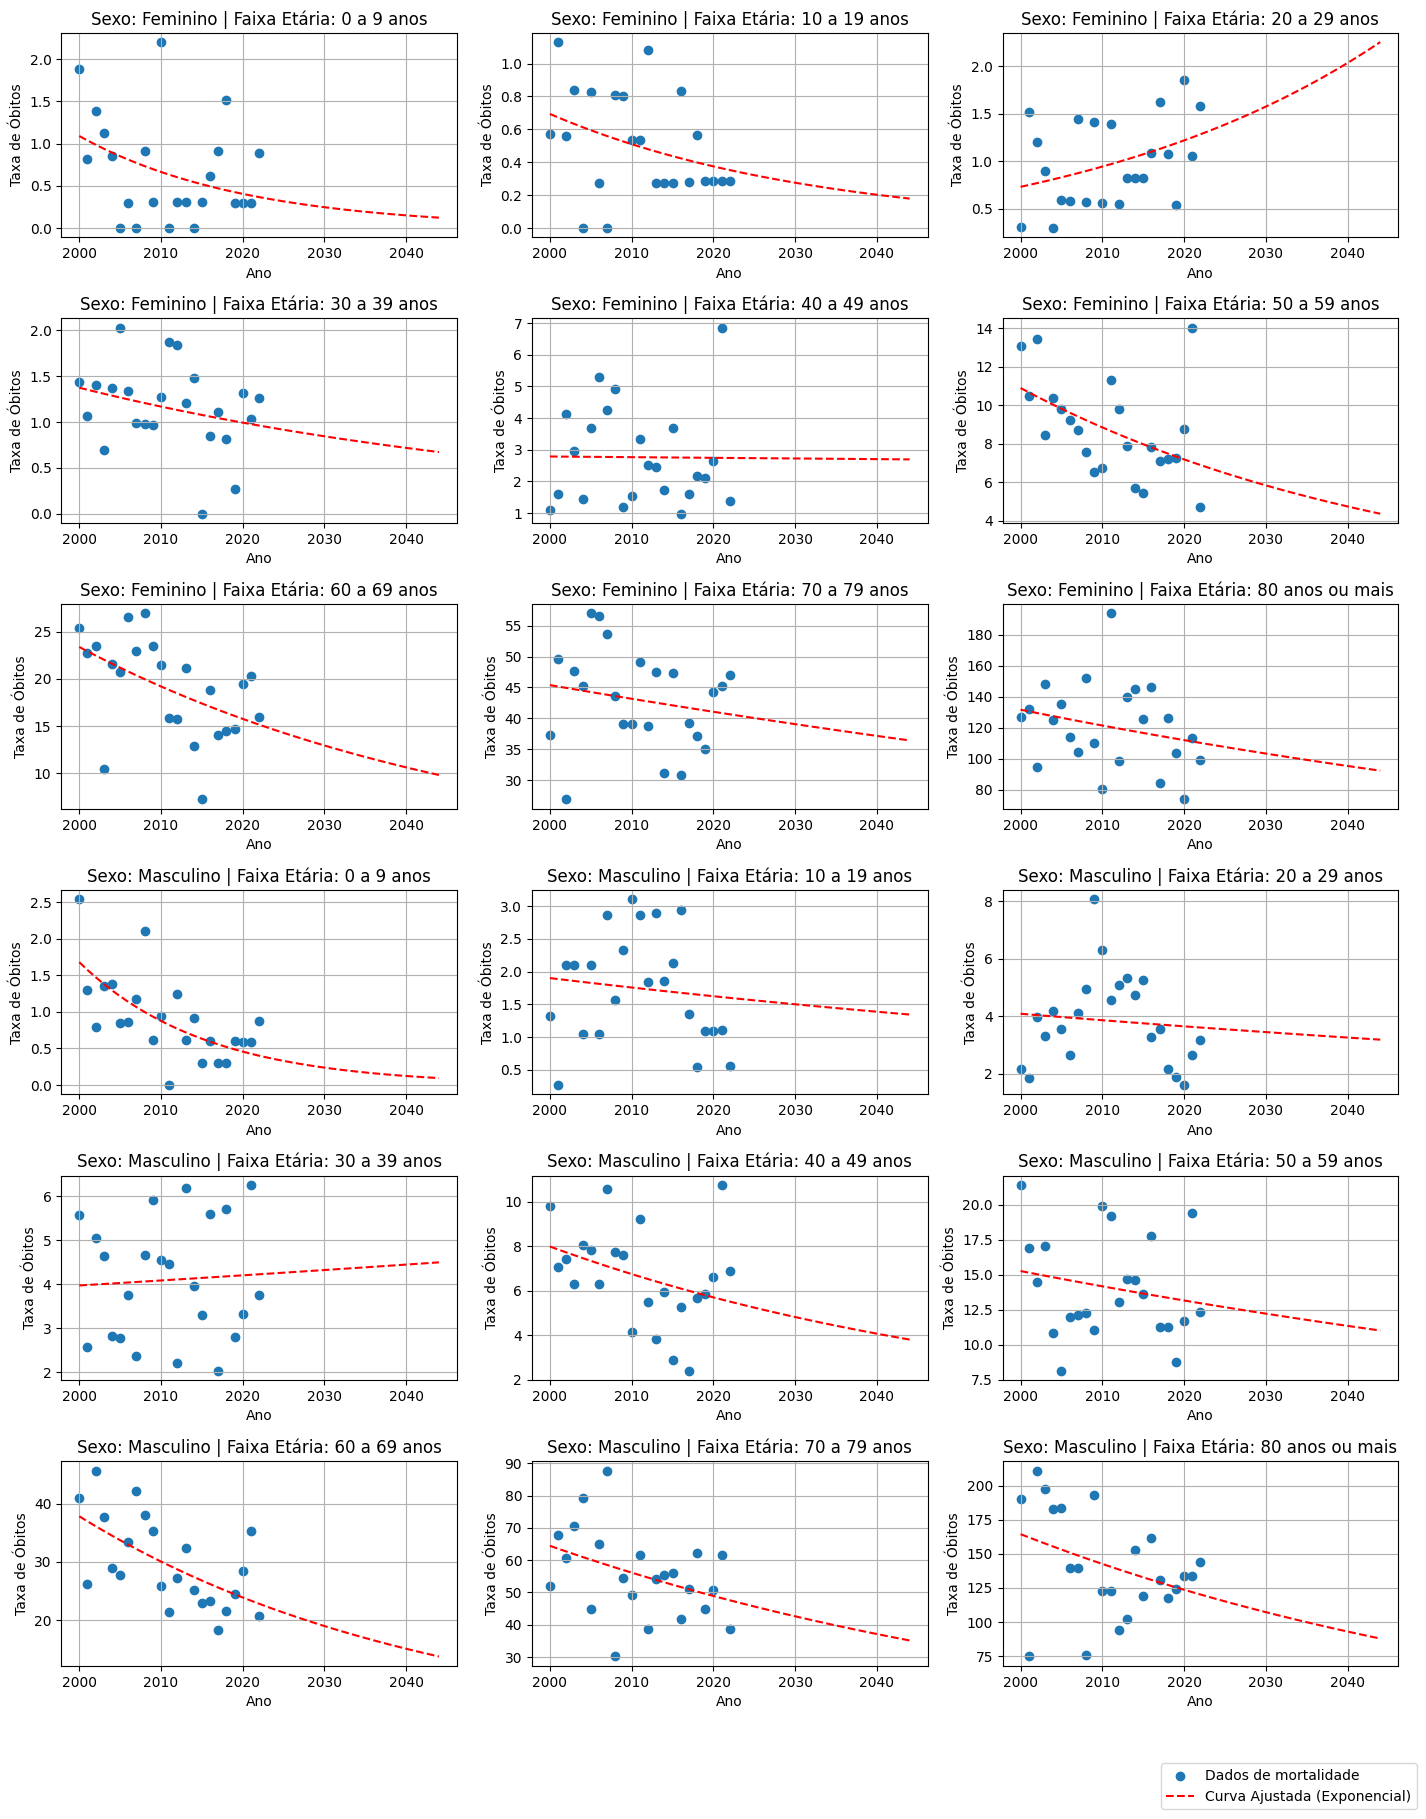

In [44]:
# criação de dataframe com taxa de mortalidade a cada mil habitantes
df_mortalidade = (df_deaths / df_pop).dropna(axis=0) * 1000
#df_mortalidade.drop(columns=[2020, 2021, 2022], inplace=True)

# Função para o modelo exponencial decrescente
def modelo_exponencial(x, constante, coeficiente):
    return constante * np.exp(coeficiente * (-x - 1))

# DataFrame de resultados
resultados = pd.DataFrame(columns=['Sexo', 'Faixa Etária', 'Constante', 'Coeficiente'])

# Combinações de sexo e faixa etária
df_mortalidade.reset_index(inplace=True)
sexos = df_mortalidade['Sexo'].unique()
faixas_etarias = df_mortalidade['Faixa Etária'].unique()
num_plots = len(sexos) * len(faixas_etarias)
num_colunas = 3
num_linhas = (num_plots + num_colunas - 1) // num_colunas

# Criar subplots para cada combinação de sexo e faixa etária
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 18))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, (sexo, faixa_etaria) in enumerate(product(sexos, faixas_etarias)):
    if i >= num_plots:
        break  # Sair se todos os subplots já estiverem preenchidos
    
    # Filtrar o DataFrame para a combinação atual
    df_filtro = df_mortalidade[(df_mortalidade['Sexo'] == sexo) & (df_mortalidade['Faixa Etária'] == faixa_etaria)]
    
    # Extrair os dados de anos e mortalidade
    anos = np.array(df_filtro.columns[2:], dtype=int) - 2000
    dados_mortalidade = df_filtro.iloc[0, 2:].values.astype(float)
    
    # Ajustar o modelo exponencial aos dados
    try:
        params, _ = curve_fit(modelo_exponencial, anos, dados_mortalidade, maxfev=10000)
        constante, coeficiente = params
    except RuntimeError:
        constante, coeficiente = np.nan, np.nan
    
    # Criar um DataFrame temporário com os resultados atuais
    df_temp = pd.DataFrame({'Sexo': [sexo], 'Faixa Etária': [faixa_etaria],
                            'Constante': [constante], 'Coeficiente': [coeficiente]})
    
    # Concatenar o DataFrame temporário ao DataFrame de resultados
    resultados = pd.concat([resultados, df_temp], ignore_index=True)

    # Calcular as previsões do modelo para os anos futuros
    anos_futuros = np.arange(0, 45)
    previsao = modelo_exponencial(anos_futuros, constante, coeficiente)
    
    # Plotar os dados originais e a curva ajustada
    row, col = divmod(i, num_colunas)
    axs[row, col].scatter(anos + 2000, dados_mortalidade, label='Dados de mortalidade', marker='o')
    axs[row, col].plot(anos_futuros + 2000, previsao, label='Curva Ajustada (Exponencial)', linestyle='--', color='red')
    axs[row, col].set_xlabel('Ano')
    axs[row, col].set_ylabel('Taxa de Óbitos')
    axs[row, col].set_title(f'Sexo: {sexo} | Faixa Etária: {faixa_etaria}')
    axs[row, col].grid(True)

# Add a single legend below all the plots in the right corner
plt.legend(bbox_to_anchor=(.4, -.7), loc='lower left', borderaxespad=0.)

# Exibir os subplots
plt.tight_layout()
plt.show()


import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [45]:
new_columns = [*resultados.columns.tolist()]
new_columns.extend(range(2022, 2045))
resultados = resultados.reindex(columns=new_columns, fill_value=0)
for year in resultados.columns[4:].astype(int):
    resultados.loc[:,year] = year-2000

resultados = pd.concat(
    objs=[
        resultados.iloc[:,:4]
        , modelo_exponencial(resultados.iloc[:, 4:], resultados.Constante.values.reshape((18,1)), resultados.Coeficiente.values.reshape((18,1)))
        ]
    , axis=1
    
)

resultados

,Sexo,Faixa Etária,Constante,Coeficiente,2022,2023,2024,2025,2026,2027,...,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044
0,Feminino,0 a 9 anos,1.145728,0.049532,0.366709,0.348988,0.332123,0.316073,0.300799,0.286263,...,0.192608,0.183300,0.174442,0.166013,0.157990,0.150355,0.143089,0.136175,0.129594,0.123331
1,Feminino,10 a 19 anos,0.715019,0.030769,0.352351,0.341675,0.331322,0.321283,0.311548,0.302108,...,0.236189,0.229033,0.222093,0.215364,0.208838,0.202510,0.196374,0.190424,0.184654,0.179059
2,Feminino,20 a 29 anos,0.712869,-0.025616,1.284941,1.318282,1.352487,1.387580,1.423584,1.460522,...,1.792700,1.839215,1.886937,1.935898,1.986128,2.037663,2.090534,2.144777,2.200428,2.257522
3,Feminino,30 a 39 anos,1.396555,0.016232,0.961435,0.945955,0.930724,0.915738,0.900994,0.886487,...,0.778532,0.765997,0.753664,0.741529,0.729590,0.717843,0.706285,0.694913,0.683724,0.672715
4,Feminino,40 a 49 anos,2.786001,0.000755,2.738043,2.735977,2.733912,2.731849,2.729787,2.727727,...,2.711303,2.709257,2.707212,2.705169,2.703128,2.701088,2.699049,2.697012,2.694977,2.692943
5,Feminino,50 a 59 anos,11.114526,0.020836,6.882865,6.740940,6.601942,6.465810,6.332485,6.201909,...,5.249709,5.141460,5.035443,4.931613,4.829923,4.730330,4.632790,4.537262,4.443704,4.352075
6,Feminino,60 a 69 anos,23.844459,0.019699,15.157133,14.861472,14.571578,14.287339,14.008645,13.735386,...,11.732728,11.503865,11.279466,11.059444,10.843714,10.632192,10.424797,10.221446,10.022063,9.826568
7,Feminino,70 a 79 anos,45.595116,0.005003,40.638802,40.435979,40.234168,40.033365,39.833564,39.634760,...,38.079635,37.889585,37.700483,37.512325,37.325106,37.138821,36.953467,36.769037,36.585527,36.402934
8,Feminino,80 anos ou mais,132.690696,0.008071,110.209072,109.323114,108.444278,107.572506,106.707743,105.849931,...,99.231088,98.433381,97.642086,96.857152,96.078528,95.306164,94.540008,93.780012,93.026125,92.278298
9,Masculino,0 a 9 anos,1.791056,0.065015,0.401503,0.376230,0.352548,0.330356,0.309561,0.290075,...,0.172435,0.161581,0.151410,0.141879,0.132948,0.124580,0.116738,0.109390,0.102504,0.096052


In [46]:
resultados.to_csv(path_or_buf='./br_demography/results/tab/mortalidade_projetada_campina_2022_2044.csv', sep=';', decimal=',', encoding='utf-16')